# Pandas for data cleaning and analysis

```{figure} https://pandas.pydata.org/static/img/pandas_secondary.svg
---
width: 50%
align: center
name:
---

```


Pandas has two main data structures:
- **`Series`**: A one-dimensional labeled array, like a single column of data.
- **`DataFrame`**: A two-dimensional labeled data structure with columns of potentially different types, similar to a spreadsheet or SQL table.

For some tutorials, check
- [kaggle pandas tutorial](https://www.kaggle.com/learn/pandas)
- [Pandas 10 minute tutorial](https://pandas.pydata.org/docs/user_guide/10min.html)

```{iframe} https://www.youtube.com/embed/EXIgjIBu4EU
:width: 80%
Learning pandas
```


## The Dataframe
The dataframe is the most important object inside pandas. It allows to represent, access, process, etc multi-dimensional data.

![Pandas dataframe](https://www.w3resource.com/w3r_images/pandas-data-structure.svg)

Source: https://www.w3resource.com/python-exercises/pandas/index.php

![Pandas dataframe example](https://miro.medium.com/max/1400/1*ZSehcrMtBWN7_qCWq_HiSg.png)

Source: https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

You can initialize a dataframe in several ways. For example, you can use a dictionary or a nested list. Or you can read from a file, either local or online. Forst, you need to import pandas

```{figure} figs/importpandas.png
---
width: 30%
align: center
name:
---
```


In [1]:
# import some needed libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install itables

In [3]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [104]:
df.dropna() # returns a new view but does not overwrite the original df

Loading ITables v2.7.0 from the internet... (need help?)


In [105]:
df.fillna("Unknown")

Loading ITables v2.7.0 from the internet... (need help?)


In [106]:
df = df.dropna()
df

Loading ITables v2.7.0 from the internet... (need help?)


In [107]:
df.index = ["Stockholm", "London", "Rome", "Paris"]
df.columns = ["Population", "State"]
df

Loading ITables v2.7.0 from the internet... (need help?)


## Applied pandas tutorial

In this tutorial we will explore a real data escenario to look for exoplanets! We will use real data and `pandas` to clean it and get some useful info. The main goal is to be able to answer questions like:
- What is the most common method for discovering exoplanets?
- What is the average size of a planet discovered in the last decade?
- Is there a relationship between a star's temperature and the mass of its planets?

But when you first look at the data, you realize it's not that simple. There are gaps, inconsistencies, and errors. This is where we need to clean the data.

### Getting the data
First, let's pull the data directly from the NASA Exoplanet Archive. This is real, live data! <https://exoplanetarchive.ipac.caltech.edu/docs/data.html>

The columns we are requesting are:

    pl_name: Planet Name

    hostname: Host Star Name

    discoverymethod: How the planet was found

    pl_orbper: Orbital Period (days)

    pl_rade: Planet Radius (Earth radii)

    pl_bmasse: Planet Mass (Earth masses)

    st_teff: Star's Effective Temperature (Kelvin)

    st_rad: Star's Radius (Solar radii)

    st_mass: Star's Mass (Solar masses)

    disc_year: Discovery Year



In [5]:
import pandas as pd
import numpy as np # We'll need numpy for more advanced NaN handling

# The official URL from the NASA Exoplanet Archive
# https://exoplanetarchive.ipac.caltech.edu/docs/data.html
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,discoverymethod,pl_orbper,pl_rade,pl_bmasse,st_teff,st_rad,st_mass,disc_year+from+ps&format=csv"

# If the webpage is down, use the following direct link
# https://drive.google.com/file/d/1a-VWenKX9BxSlUv7edBK6OpXTC7drQAo/view?usp=sharing

# Load the data into a pandas DataFrame
df = pd.read_csv(url) # go and read the manual

In [6]:
print("Our Raw Exoplanet Data (First 5 Rows):")
df.head()

Our Raw Exoplanet Data (First 5 Rows):


Loading ITables v2.7.0 from the internet... (need help?)


In [7]:
print("\n--- Mission Critical Info ---")
df.info()


--- Mission Critical Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39386 entries, 0 to 39385
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          39386 non-null  object 
 1   hostname         39386 non-null  object 
 2   discoverymethod  39386 non-null  object 
 3   pl_orbper        36076 non-null  float64
 4   pl_rade          27129 non-null  float64
 5   pl_bmasse        7219 non-null   float64
 6   st_teff          35880 non-null  float64
 7   st_rad           36063 non-null  float64
 8   st_mass          33202 non-null  float64
 9   disc_year        39384 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.0+ MB


In [8]:
df.describe()

Loading ITables v2.7.0 from the internet... (need help?)


In [9]:
#the rename function let's you change the names
df = df.rename(columns={'pl_name':'planet_name'})


:::{exercise} Explore how to change column names (without actually doing it)
Search on how to change some column names to something better, like changing `pl_orbper` to `period`
:::

In [10]:
df = df.rename(columns={
    'pl_name': 'planet_name',
    'pl_rade': 'radius',
    'pl_orbper': 'orbital_period',
    'disc_year': 'year'
})

Let's check if there are duplicates:
```{exercise}
Using the functions `df.duplicates()` and `df.duplicated()` and `df.duplicated().sum()`, check if there are duplicates on the data.

In [11]:
df.duplicated().count()

np.int64(39386)

In [13]:
df.isnull().sum()

Loading ITables v2.7.0 from the internet... (need help?)


In [115]:
# YOUR CODE HERE
columns = df.columns.tolist()
print("duplicated")
for i in columns:
    column = str(i)
    print(column,f': {np.size(df[column].duplicated())}')


duplicated
planet_name : 39386
hostname : 39386
discoverymethod : 39386
orbital_period : 39386
radius : 39386
pl_bmasse : 39386
st_teff : 39386
st_rad : 39386
st_mass : 39386
year : 39386


### Null values
Let's now check the null values

Loading ITables v2.7.0 from the internet... (need help?)


Now, analyze the output from the `.isnull` function:
- `Total entries`
- `Non-null count` : Significant missing data problem
- `Dtype`: getting `float` or `int` is good (where it makes sense). If all were objects, that would signal hidden text or errors.

Before doing any chance, let's quantify the missing or duplicated data.

:::{exercise} Quantifying the void
Use a single pandas command to calculate the total number of missing values for each column. What column has the most missing data? does it make sense (measuring mass or radius can be much harder that just measuring the presence)
:::

In [15]:
# YOUR CODE HERE
df[df.isnull() == True].sum()


Loading ITables v2.7.0 from the internet... (need help?)


You can also access columns or groups of columns like


In [16]:
df[['orbital_period', 'radius']]

Loading ITables v2.7.0 from the internet... (need help?)


### Handling missing values
Missing data will affect your analysis. To handle it, you need to think _why_ the data is missing, and _how much_ data is missing.

<Axes: >

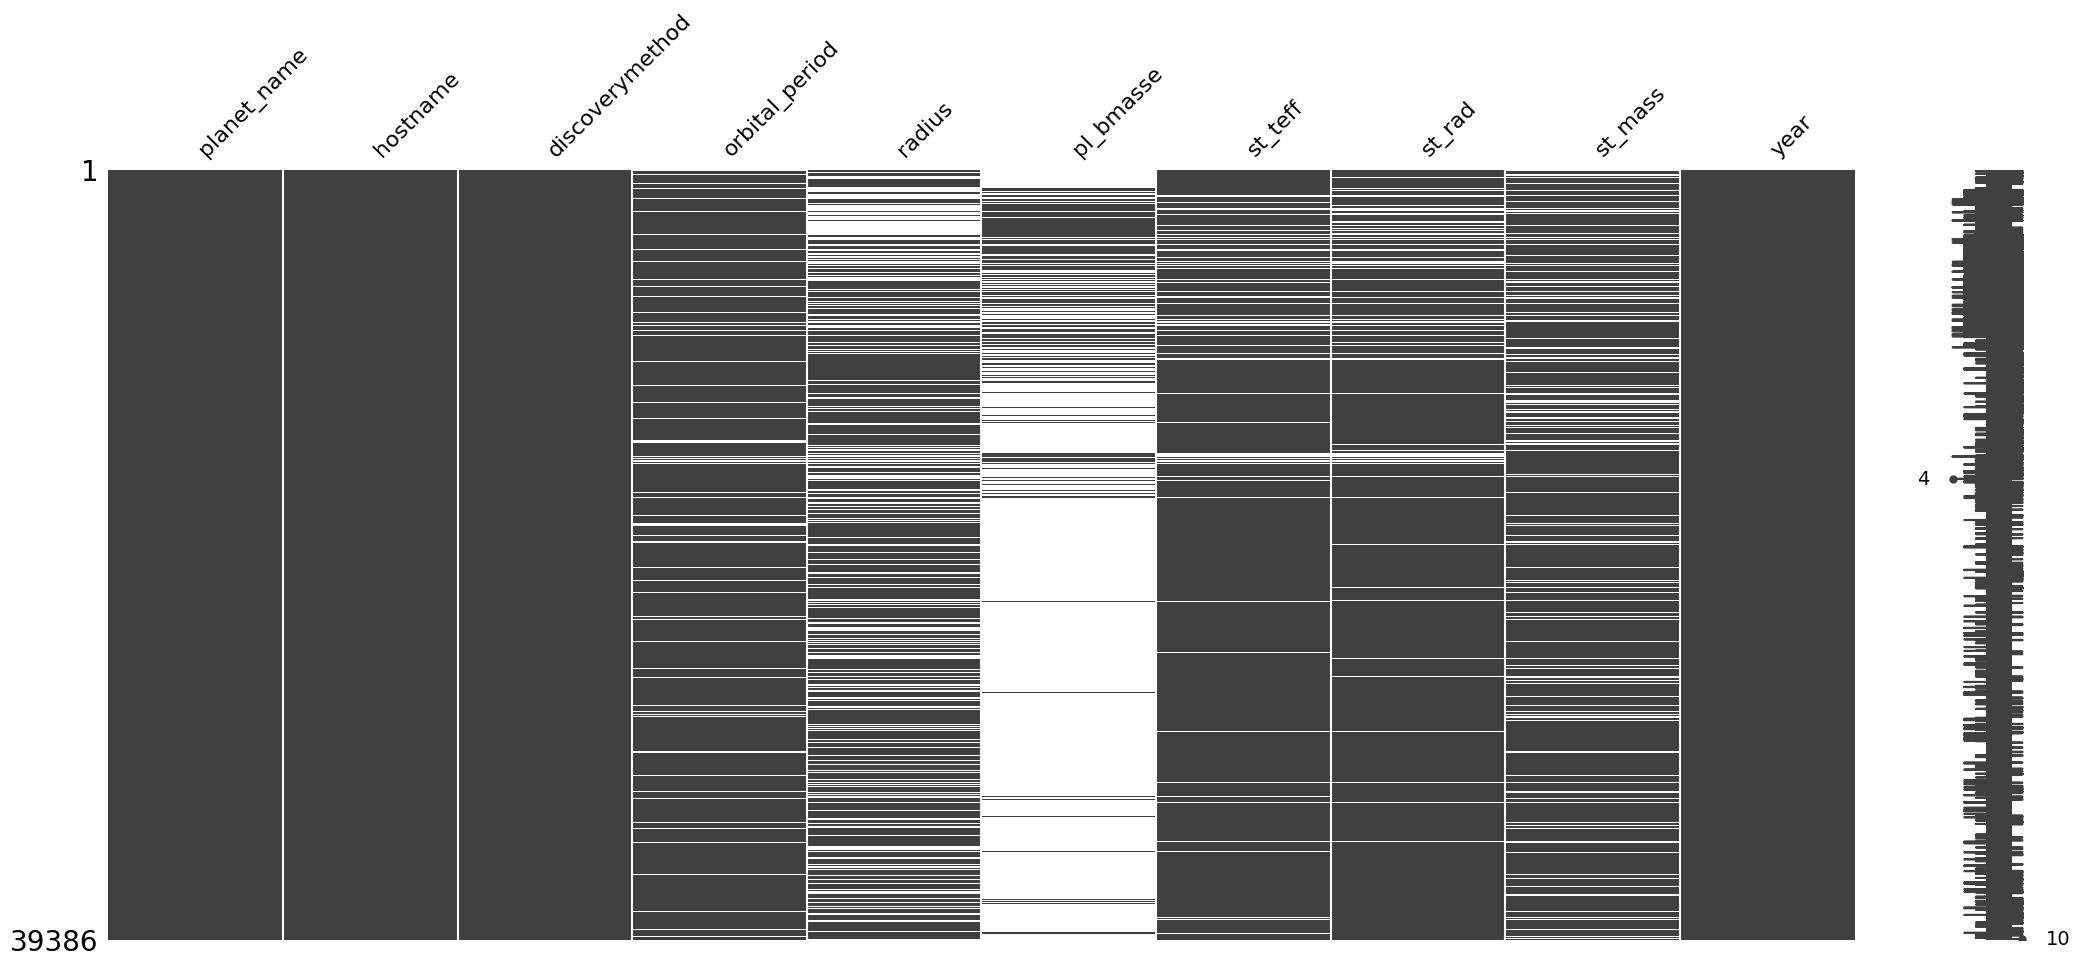

In [17]:
import missingno as msno # Check https://github.com/ResidentMario/missingno
%matplotlib inline
msno.matrix(df)

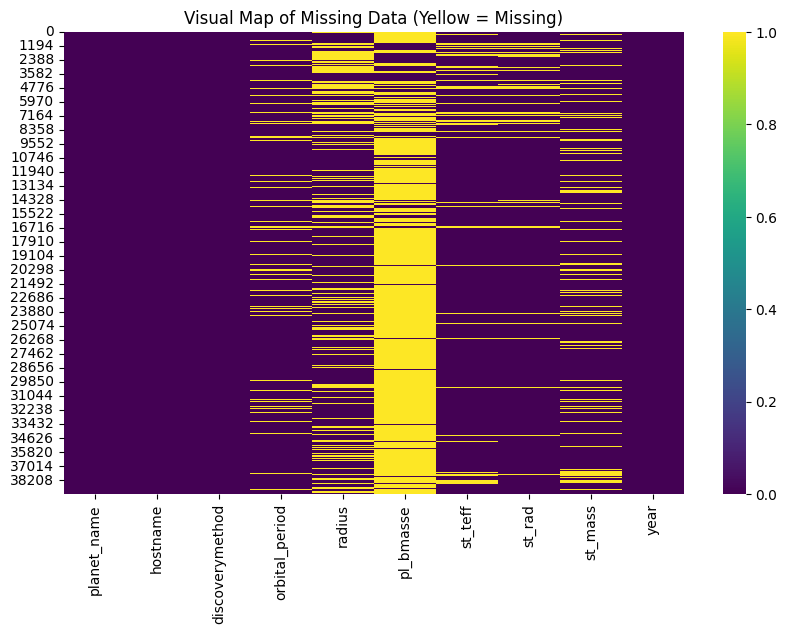

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Visual Map of Missing Data (Yellow = Missing)")
plt.show()

Let's focus on the key planetary characteristics: `pl_orbper`, `pl_rade`, and `pl_bmasse`.

Dropping all rows with any missing data (`df.dropna()`) would be a disaster: we'd lose a huge portion of our catalog! A better approach is imputation: filling the gaps with a sensible calculated value.

The *median* is often a better choice for imputation than the *mean* for astronomical data, as it's less sensitive to extreme outliers (e.g., a planet with a gigantic radius or a very long orbital period). Check also https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html .

In [19]:
# It's good practice to work on a copy
df_cleaned = df.copy()

# Calculate the median for the columns we want to fill
# We'll calculate them from the original data before we start changing it
median_radius = df_cleaned['radius'].median()
median_mass = df_cleaned['pl_bmasse'].median()
median_orb_period = df_cleaned['orbital_period'].median()
# Impute the missing values using the calculated medians
# df_cleaned['pl_rade'].fillna(median_radius, inplace=True) # Avoid inplace=True in a copy object
df_cleaned['radius'] = df_cleaned['radius'].fillna(median_radius)
df_cleaned['pl_bmasse'] = df_cleaned['pl_bmasse'].fillna(median_mass)
df_cleaned['orbital_period'] = df_cleaned['orbital_period'].fillna(median_orb_period)
# # or better use
# df_cleaned.fillna({
#     'pl_rade': df_cleaned['pl_rade'].median(),
#     'pl_bmasse': df_cleaned['pl_bmasse'].median(),
#     'pl_orbper': df_cleaned['pl_orbper'].median()
# }, inplace=True)

In [20]:
print("--- Missing Values After Imputation ---")
print(df_cleaned.isnull().sum())

--- Missing Values After Imputation ---
planet_name           0
hostname              0
discoverymethod       0
orbital_period        0
radius                0
pl_bmasse             0
st_teff            3506
st_rad             3323
st_mass            6184
year                  2
dtype: int64


Now our core planet columns are filled! We still have missing data in the star properties (st_teff, st_rad, st_mass), but we can leave them for now, as our analysis might not always require them.

:::{exercise} Missing star data
1. Choose one of the star-related columns with missing data (st_teff, st_rad, or st_mass).
2. Calculate the median for that column.
3. Impute (fill) the missing values in that column using its median.
4. Verify your work by checking the isnull().sum() count for that column again. It should be zero!
:::

:::{warning}
Think about the effect of imputing data like this. Will the analysis be affected?
:::

In [21]:
def fill_missing_with_median(df_dummy, column_name):
  median = df_dummy[column_name].median()
  null_values = df_dummy[column_name].isnull().sum()
  print(f"befor the fill : {null_values}")
  df_dummy[column_name] = df_dummy[column_name].fillna(median)
  null_values = df_dummy[column_name].isnull().sum()
  print(f"after the fill : {null_values}")
  return df_dummy.copy()

In [22]:
# YOUR CODE HERE

df_cleaned = fill_missing_with_median(df_cleaned, "st_teff")
df_cleaned = fill_missing_with_median(df_cleaned, "st_rad")
df_cleaned = fill_missing_with_median(df_cleaned, "st_mass")

befor the fill : 3506
after the fill : 0
befor the fill : 3323
after the fill : 0
befor the fill : 6184
after the fill : 0


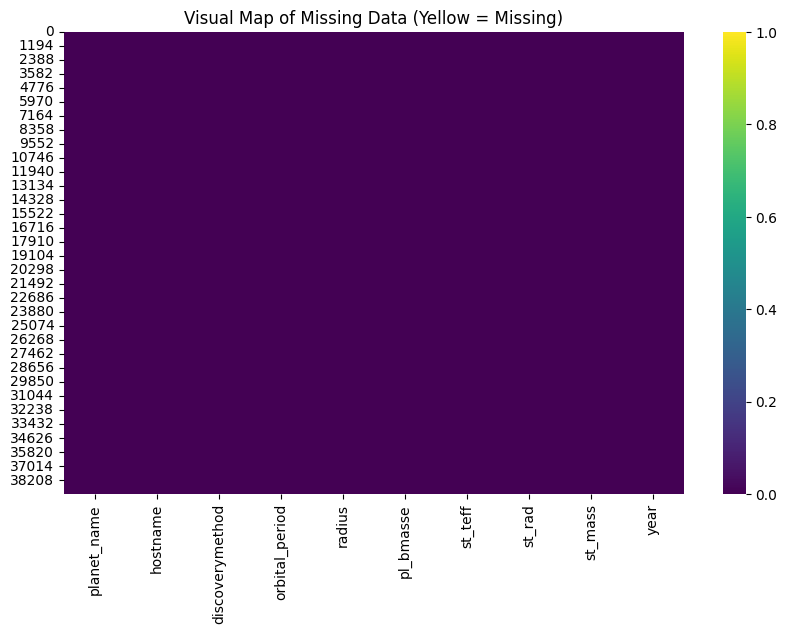

In [23]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cbar=True, cmap='viridis')
plt.title("Visual Map of Missing Data (Yellow = Missing)")
plt.show()

### Correcting Cosmic Anomalies (Outliers)
Outliers are extreme values that can skew our understanding. They could be real, fascinating discoveries (like a planet with a massive orbit) or simple data entry errors. Visualizing the data is the best way to spot them.

A **box plot** is a powerful tool for outlier detection.




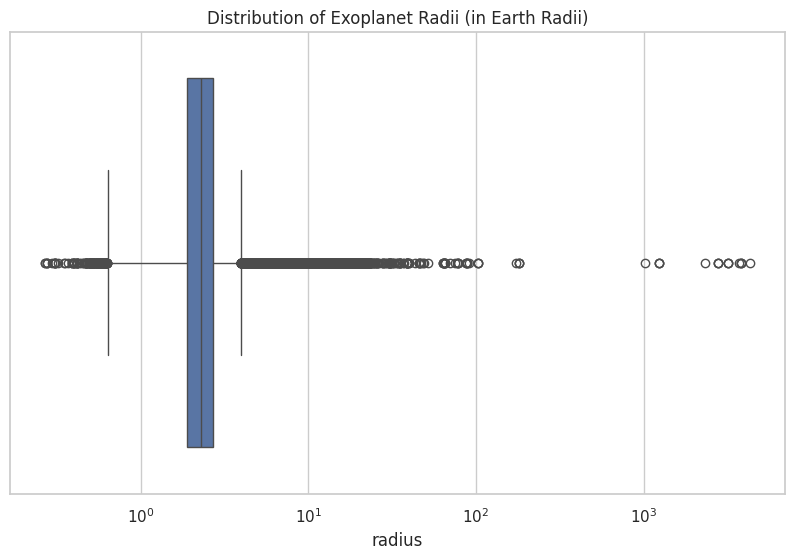

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set_theme(style="whitegrid")

# Let's visualize the distribution of Planet Radius
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['radius']) # Is it the same as using the non-cleaned data?
plt.title('Distribution of Exoplanet Radii (in Earth Radii)')
plt.xscale('log') # Log scale is often essential for astronomical data!
plt.show()

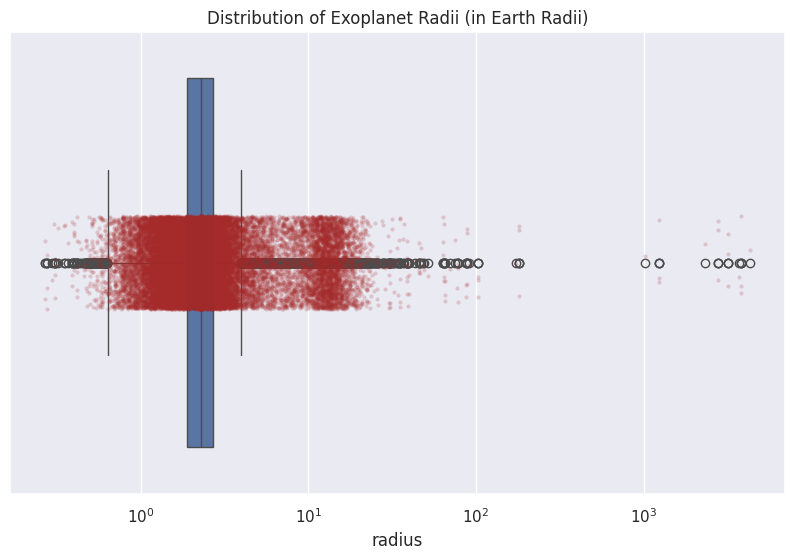

In [25]:
# Plot showing data
# Maybe use stripplot, swarmplot, or even a violin plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))

# First the boxplot
sns.boxplot(x=df_cleaned['radius'])

# Overlay the data as scatter (stripplot)
sns.stripplot(x=df_cleaned['radius'],
              color='brown',
              alpha=0.2,   # transparency
              size=3,      # point size
              jitter=True) # adds random jitter to avoid overlap

plt.title('Distribution of Exoplanet Radii (in Earth Radii)')
plt.xscale('log')
plt.xlabel('radius')
plt.show()

Notice that the box plot shows many points far to the right. These are planets with very large radii. A log scale helps, but we can see that most planets are clustered in a smaller range. Let's say, for a specific analysis, we want to focus only on planets that are somewhat similar to Earth, and we consider anything over 20 Earth radii to be a "super-giant" that we want to handle separately.

This is not about deleting data, but about filtering it for a specific analysis.

In [26]:
# How many planets are larger than 20 Earth radii?
super_giants = df_cleaned[df_cleaned['radius'] > 20] # you can use any other condition
print(f"There are {len(super_giants)} planets with a radius greater than 20 Earths.")

# For our analysis, let's create a new DataFrame without these giants
df_filtered = df_cleaned[df_cleaned['radius'] <= 20].copy()

print(f"\nOriginal DataFrame size: {len(df_cleaned)}")
print(f"Filtered DataFrame size: {len(df_filtered)}")

There are 217 planets with a radius greater than 20 Earths.

Original DataFrame size: 39386
Filtered DataFrame size: 39169


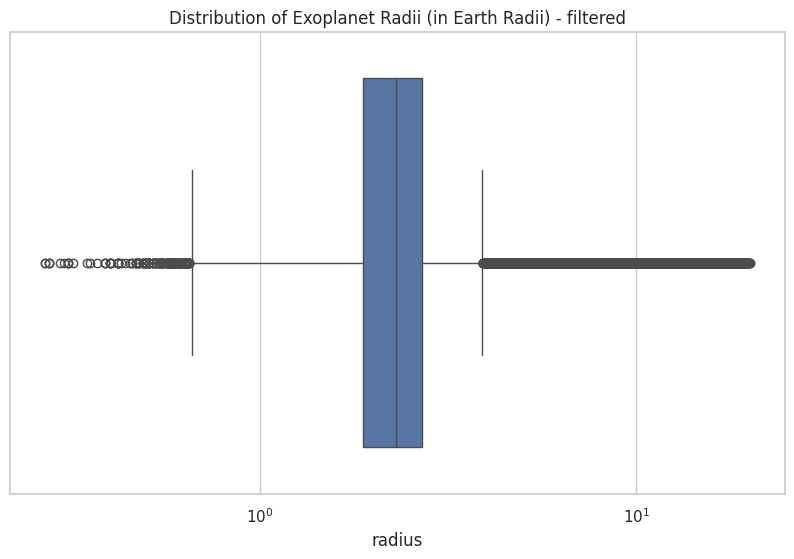

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set_theme(style="whitegrid")

# Let's visualize the distribution of Planet Radius
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['radius'])
plt.title('Distribution of Exoplanet Radii (in Earth Radii) - filtered')
plt.xscale('log') # Log scale is often essential for astronomical data!
plt.show()

```{tip} A better way to filter outliers
It is much better to filter using interquartil filters
```{code} python
# Simple robust filter
Q1 = df['radius'].quantile(0.25)
Q3 = df['radius'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

print(f"Statistically, anything above {upper_limit:.2f} is an outlier.")
```
```

:::{exercise} Explain this command

:::

The "query" df_cleaned[condition].iloc[range]
accsess all the values that have a radius greater than 20 (earth radiuses). Furthermore .iloc() accsess a specific range of that query. In this case is the value 100 to 110.  

In [28]:
# Explain this syntax
tmp = df_cleaned[df_cleaned['radius'] > 20].iloc[100:110] # access specific rows
tmp

Loading ITables v2.7.0 from the internet... (need help?)


:::{exercise} Planet mass
1. Create a box plot for pl_bmasse. Remember to use a log scale (plt.xscale('log')) to get a better view.

2. Based on the plot, choose a reasonable upper limit to filter out extreme outliers (for example, you might decide anything over 3000 Earth masses is an outlier worth investigating).

3. Filter the df_filtered DataFrame further to remove these mass outliers. Print the number of rows before and after to see how many planets you filtered.
:::

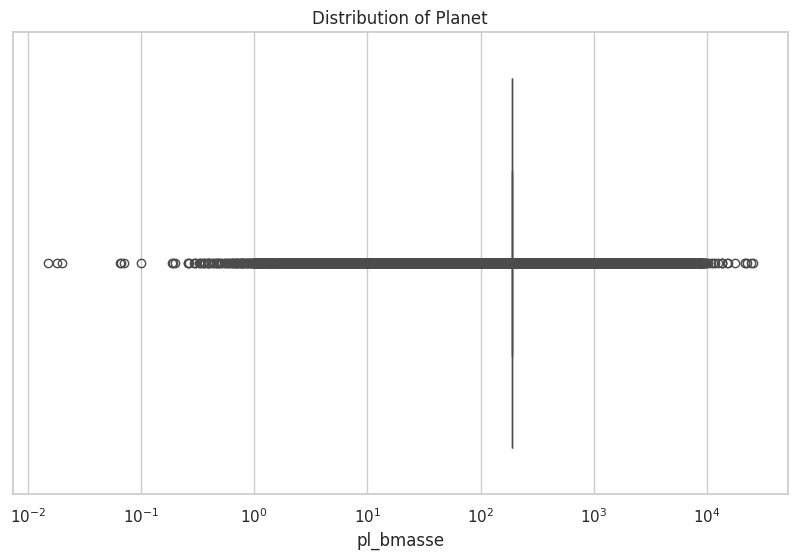

max :25426.4
min :0.015


In [50]:
# YOUR CODE HERE
planet_mass = df_cleaned['pl_bmasse']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x= planet_mass)
plt.xscale('log')
plt.title("Distribution of Planet")
plt.show()
#
print(f"max :{planet_mass.max()}")
print(f"min :{planet_mass.min()}")

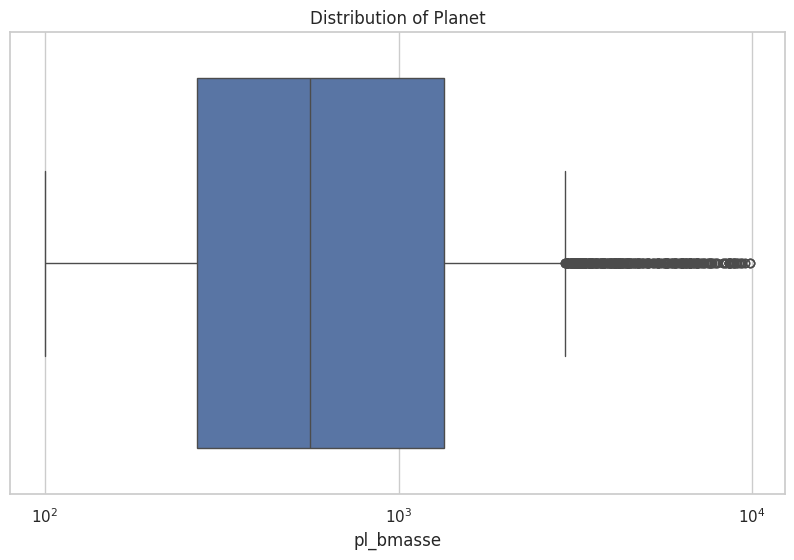

max :9852.73
min :100.11645


In [52]:
df_mass_filter = df_cleaned[(df['pl_bmasse'] < 10E3) & (df['pl_bmasse']> 10E1)]
# YOUR CODE HERE
planet_mass = df_mass_filter['pl_bmasse']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x= df_mass_filter['pl_bmasse'])
plt.xscale('log')
plt.title("Distribution of Planet")
plt.show()
print(f"max :{planet_mass.max()}")
print(f"min :{planet_mass.min()}")

### More analysis
Now let's try to answer the following question: What is the most common discovery method for each decade?

To answer this, we need to make sure our `discoverymethod` and `disc_year` columns are clean and ready.

In [53]:
# Let's check the different discovery methods
print("Unique Discovery Methods:")
print(df_filtered['discoverymethod'].value_counts())

Unique Discovery Methods:
discoverymethod
Transit                          35174
Radial Velocity                   2831
Microlensing                       778
Transit Timing Variations          159
Imaging                            158
Eclipse Timing Variations           26
Orbital Brightness Modulation       21
Pulsar Timing                       13
Astrometry                           6
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: count, dtype: int64


The data looks clean. Now, let's use our cleaned data to answer the question.

In [60]:
# Let's create a 'decade' column for easier grouping
# We can do this by integer division
df_filtered['discovery_decade'] = (df_filtered['year'] // 10) * 10
df_filtered.head()

Loading ITables v2.7.0 from the internet... (need help?)


In [61]:
# Now, let's count the methods per decade
discovery_summary = df_filtered.groupby('discovery_decade')['discoverymethod'].value_counts()
print(discovery_summary)

discovery_decade  discoverymethod              
1990.0            Radial Velocity                    181
                  Pulsar Timing                        8
2000.0            Radial Velocity                   1189
                  Transit                            726
                  Imaging                             41
                  Microlensing                        26
                  Eclipse Timing Variations            2
                  Pulsar Timing                        1
                  Pulsation Timing Variations          1
2010.0            Transit                          28817
                  Radial Velocity                    951
                  Microlensing                       261
                  Transit Timing Variations          129
                  Imaging                             69
                  Eclipse Timing Variations           20
                  Orbital Brightness Modulation       18
                  Pulsar Timing         

In [62]:
print("\n--- Discovery Method Counts per Decade ---")
print(discovery_summary)


--- Discovery Method Counts per Decade ---
discovery_decade  discoverymethod              
1990.0            Radial Velocity                    181
                  Pulsar Timing                        8
2000.0            Radial Velocity                   1189
                  Transit                            726
                  Imaging                             41
                  Microlensing                        26
                  Eclipse Timing Variations            2
                  Pulsar Timing                        1
                  Pulsation Timing Variations          1
2010.0            Transit                          28817
                  Radial Velocity                    951
                  Microlensing                       261
                  Transit Timing Variations          129
                  Imaging                             69
                  Eclipse Timing Variations           20
                  Orbital Brightness Modulation      

:::{exercise} Visualizing the discovery data
1. The discovery_summary data is a Series. To plot it effectively with seaborn, it's often easier to convert it into a DataFrame. Use the .reset_index() method on discovery_summary.

2. Rename the new column (which will likely be named count or 0) to something more descriptive, like planet_count.

3. Create a bar plot using seaborn.barplot() to show the planet_count for each discoverymethod, grouped by discovery_decade. Hint: Use x='discovery_decade', y='planet_count', and hue='discoverymethod'.

4. Give your plot a good title, like "Dominant Exoplanet Discovery Methods by Decade".
:::

In [70]:
# YOUR CODE HERE

discovery_summary = discovery_summary.reset_index()
discovery_summary = discovery_summary.rename(columns={'level_0':'planet_count'})
#

In [71]:
discovery_summary.head()

Loading ITables v2.7.0 from the internet... (need help?)


Text(0.5, 1.0, 'Dominant Exoplanet Discovery Methods by Decade')

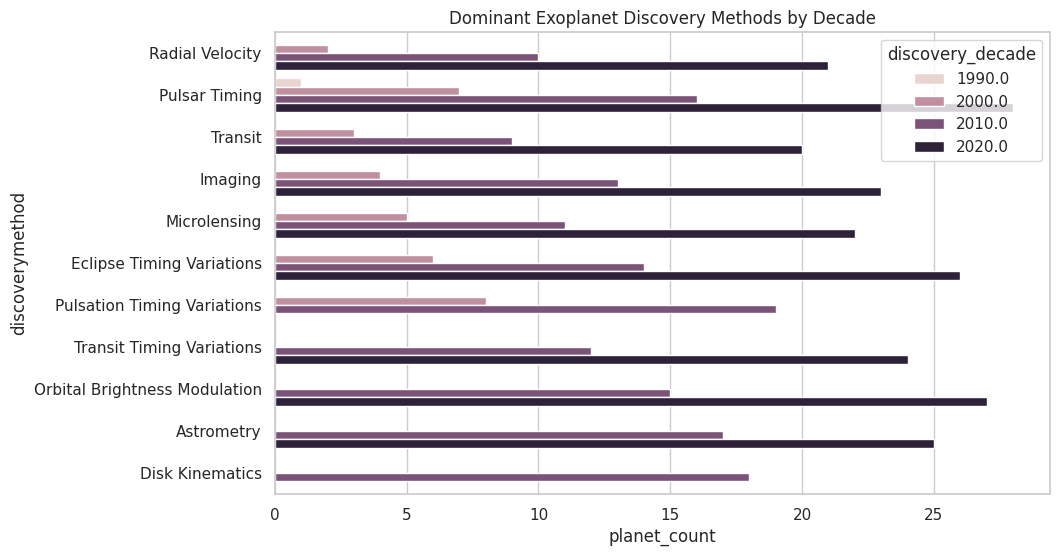

In [83]:

plt.figure(figsize=(10, 6))
sns.barplot(x="planet_count",y="discoverymethod",hue="discovery_decade", data=discovery_summary)
plt.title("Dominant Exoplanet Discovery Methods by Decade")

What can you conclude from your plot? Which method dominated the 2010s?

### More about pandas
`Pandas` offers much more than what was shown here. Please check:
- `apply`: to apply a function to a column. Example: make all pl_name lower: `df['pl_name'].apply(lambda x: x.lower()) `
- Operation across columns: `df['what is this'] = df['pl_rade'] + df['pl_orbper']`
- Concatenation: `concat`
- Merge: `merge`
- `query`: `df.query('A > B')`, <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html>
- `at`: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html>
- `where`: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html>
- reports: <https://docs.profiling.ydata.ai/latest/>
- ...


## Future Learning


### Polars
```{figure} https://pypi-camo.freetls.fastly.net/fac9f1945cd7594df0567bc53f726274340624f5/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f706f6c612d72732f706f6c6172732d7374617469632f6d61737465722f62616e6e65722f706f6c6172735f6769746875625f62616e6e65722e737667
---
width: 50%
align: center
name:
---

```


[Polars](https://pola.rs/) is a newer, extremely fast DataFrame library built in Rust. It's gaining popularity for its performance, especially on large datasets. See the [polars documentation](https://docs.pola.rs/) . It seems that the current pandas advantage over polars is [geopandas](https://geopandas.org/en/stable/).

| Feature | Pandas | Polars |
|---|---|---|
| **Backend** | Python/NumPy (partially C) | Rust (built on Apache Arrow)  |
| **Performance** | Slower, especially on large data.  | Significantly faster (5-100x) due to parallelism and query optimization.  |
| **Execution Model** | Eager (executes line-by-line)  | Supports both Eager and Lazy execution (optimizes the whole query before running)  |
| **Memory Usage** | Higher memory footprint.  | More memory efficient.  |
| **API** | Very flexible, but can be inconsistent (e.g., `inplace`). | More consistent and expressive, encourages method chaining.  |
| **Ecosystem** | Mature and extensive. Integrates with almost every data science library (scikit-learn, Matplotlib, etc.). | Growing, but less integrated with the broader ML ecosystem.  |


```{figure} https://pola.rs/_astro/perf-illustration.jHjw6PiD_hpOso.svg
---
width: 50%
align: center
name:
---

```


**When to choose which?**
- **Pandas**: Excellent for data exploration, smaller datasets (up to a few GB), and projects that need deep integration with libraries like scikit-learn.
- **Polars**: Ideal for large datasets, performance-critical data transformations, and building data pipelines where speed and memory are key.

#### Polars Syntax Example

Notice the similarity, but also the use of expressions (`pl.col()`).

**Simple exercise**
Complete the demo (find a data source) and create a script with inline dependencies.

```python
import polars as pl

# Same data in a Polars DataFrame
df_pl = pl.DataFrame(data)

# The same aggregation, but using the Polars expression API
polar_stats = df_pl.group_by('Experiment').agg(
    pl.col('Measurement').mean().alias('mean'),
    pl.col('Measurement').std().alias('std')
)

print(polar_stats)
```


```{iframe} https://www.youtube.com/embed/vAx5yVoA7cI
:width: 80%
Polars versus pandas in speed
```

```{iframe} https://www.youtube.com/embed/zthI91ASV58
:width: 80%
Polars versus pandas in speed
```

### Openrefine
```{figure} https://openrefine.org/img/openrefine_logo.svg
---
width: 50%
align: center
name:
---

```

<https://openrefine.org/>

```{iframe} https://www.youtube.com/embed/sAS0_RQSmms
:width: 80%
Intro to oepn refine
```